# Analyse of the numbers

Reasearch questions :
* What is the evolution of the number of ads by parti ?
* Is there any difference between north and south in the use of facebook ads ?
* Is the number of likes of budget allocated to ads related to the number of seats or delta ?
* What is the strategy of the different partis concerning ads on social media

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GENERATED_PATH = '../generated/'
DATA_PATH = '../data/'

vlaams = ['vlaams_belang', 'nva', 'spa', 'cd&v', 'openvld', 'groen', 'pvda']
wallon = ['defi', 'mr', 'ps', 'ecolo', 'ptb', 'cdh']

In [2]:
# Load Both dataframe
ads = pd.read_csv(GENERATED_PATH+'clean_ads.csv', index_col='id', parse_dates=['date'])
stats_partis = pd.read_csv(DATA_PATH+'partis.csv', index_col='parti')

In [3]:
ads

,date,status,text,photo,parti
id,,,,,
2569810063337461,2019-12-30,Inactive,"""Dat het parlement het noodfonds voor de zorgs...",NaN,pvda
597233301087949,2019-12-29,Inactive,Volgens minister van mobiliteit Lydia Peeters ...,NaN,pvda
1006679919677926,2019-12-28,Inactive,PVDA-volksvertegenwoordiger Tom De Meester kre...,NaN,pvda
453496188939322,2019-12-28,Inactive,De sociale zekerheid: één van de mooiste verwo...,https://scontent.fgva1-1.fna.fbcdn.net/v/t1.64...,pvda
2371935939784262,2019-12-26,Inactive,"🤔 “De vergrijzing kost massa’s geld”, “het beg...",https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,pvda
...,...,...,...,...,...
293684658191953,2019-04-18,Inactive,📝 Élections 2019 📝 Découvrez #CeQuiEstJuste p...,https://scontent-bru2-1.xx.fbcdn.net/v/t1.6435...,defi
427179238049668,2019-04-25,Inactive,"☑ #CeQuiEstJuste, c'est d'encourager la format...",NaN,defi
2330881237233877,2019-04-15,Inactive,"☑ #CeQuiEstJuste pour le climat, c'est de ""fai...",https://scontent-bru2-1.xx.fbcdn.net/v/t1.6435...,defi


In [4]:
stats_partis

,budget,like,seat,delta,color
parti,,,,,
defi,NaN,7467,2,0,#E11482
vlaams_belang,779365.0,490523,18,15,#FFED00
nva,250863.0,260647,25,-8,#F2BD2E
spa,NaN,99461,9,-4,#E30613
cd&v,79173.0,66836,12,-6,#FF8000
openvld,160801.0,128565,12,-2,#0087DC
mr,20518.0,33501,14,-6,#0047AB
ps,45962.0,60015,20,-3,#FF0000
ecolo,9364.0,30198,13,7,#99CC33


# What is the evolution of the number of ads by parti ?

We will first look at the global evolution of the number of ads

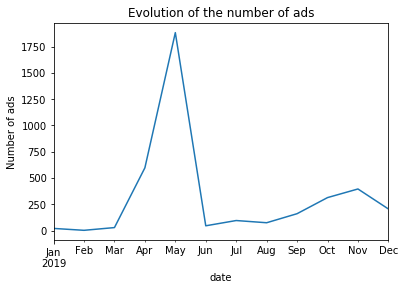

In [5]:
# Compute the total number of ads by month
global_count_ads = ads.set_index('date').resample('M').count().status

plt.figure()
global_count_ads.plot()
plt.title("Evolution of the number of ads")
plt.ylabel("Number of ads")
plt.show()

We can see that before the elections there are almost no ads from political partis on facebook (even for comunal election in october 2018). The campaing begins in march and the number of ads make a peak. After the elections the number of ads drops and go back to almost 0 (probably due to the fact that partis do not want to spend lot of money on ads just after election).

After that we can see that the number of add grows more slowly as the political crisis grows. It shows that the partis wants to take the public opinions in their favour in this crises.

We can also notice that the number of ads has decreased in decembre, due to the end of the year vacation for polictics.

We will now look at it by parti :
(Further improvement make it using pyplot)

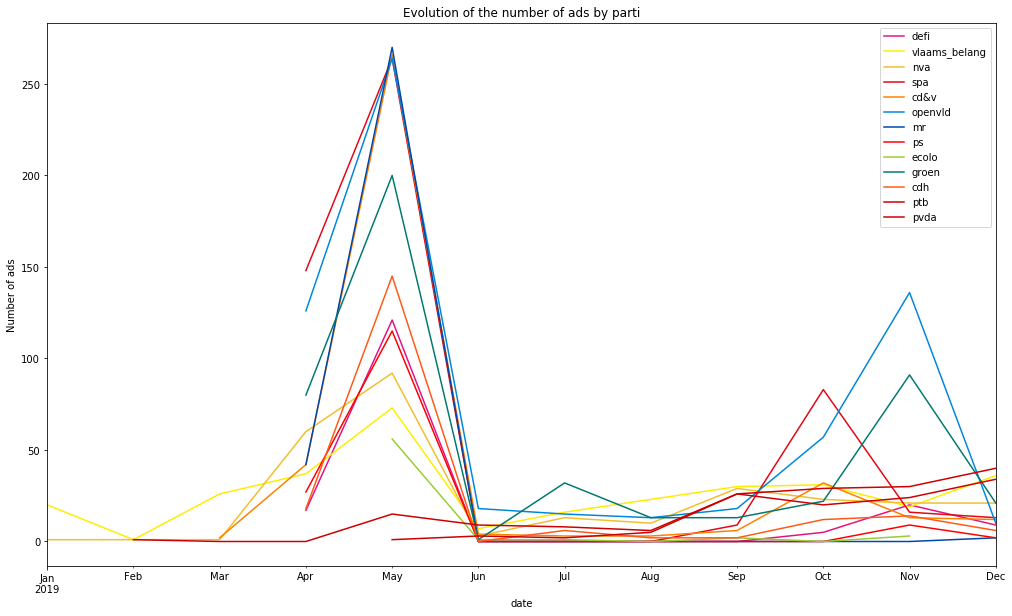

In [6]:
plt.figure(figsize=(17,10))

for parti in stats_partis.index:
    ads_parti = ads[ads.parti == parti]
    count_ads_parti = ads_parti.set_index('date').resample('M').count().status
    count_ads_parti.plot(label=parti, color=stats_partis.loc[parti].color)
    
plt.title("Evolution of the number of ads by parti")
plt.ylabel("Number of ads")
plt.legend()
plt.show()

TODO : Analyse this plot

## Is there any difference between north and south in the use of facebook ads ?
First we will look at the evolution of the number of ads in the north and south of the country. Then we will look at the budget and the number of likes

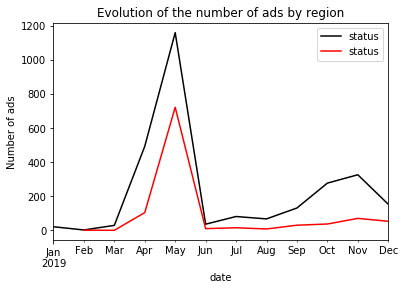

In [7]:
plt.figure()

#Vlanderen
ads_vl = ads[ads.parti.isin(vlaams)]
ads_vl.set_index('date').resample('M').count().status.plot(legend="Vlanderen", color="black")

#Wallonie
ads_wl = ads[ads.parti.isin(wallon)]
ads_wl.set_index('date').resample('M').count().status.plot(legend="Wallonie", color="red")

plt.title("Evolution of the number of ads by region")
plt.ylabel("Number of ads")
plt.legend()
plt.show()

We first see that during the campaign there is much more ads in vlanderen than in wallonie. The we can also observed that the growing in ads from the beginning is almost only in vlanderen (caused by Open Vld, Spa and groen, see previous graph).

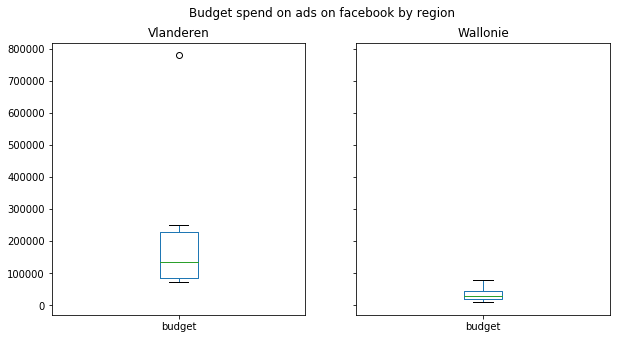

In [8]:
vlaams_stats = stats_partis[stats_partis.index.isin(vlaams)][['budget', 'like']]
wallonie_stats = stats_partis[stats_partis.index.isin(wallon)][['budget', 'like']]

fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
vlaams_stats.budget.plot.box(ax=ax1)
ax1.set_title("Vlanderen")
wallonie_stats.budget.plot.box(ax=ax2)
ax2.set_title("Wallonie")
plt.suptitle("Budget spend on ads on facebook by region")
plt.show()

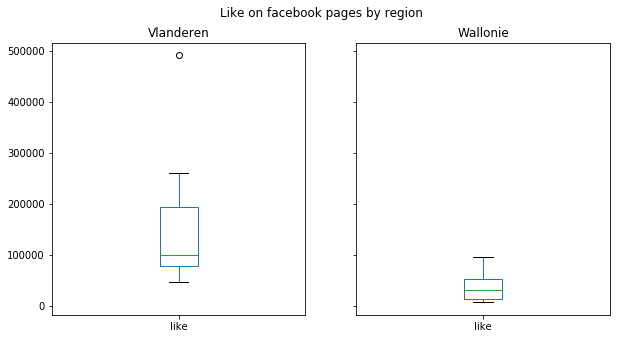

In [9]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
vlaams_stats.like.plot.box(ax=ax1)
ax1.set_title("Vlanderen")
wallonie_stats.like.plot.box(ax=ax2)
ax2.set_title("Wallonie")
plt.suptitle("Like on facebook pages by region")
plt.show()

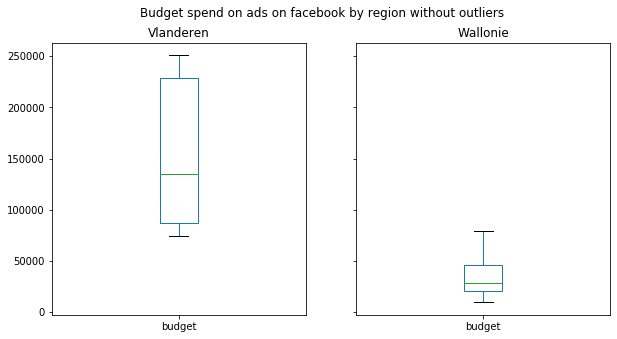

In [10]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
vlaams_stats.budget.plot.box(ax=ax1, showfliers=False)
ax1.set_title("Vlanderen")
wallonie_stats.budget.plot.box(ax=ax2)
ax2.set_title("Wallonie")
plt.suptitle("Budget spend on ads on facebook by region without outliers")
plt.show()

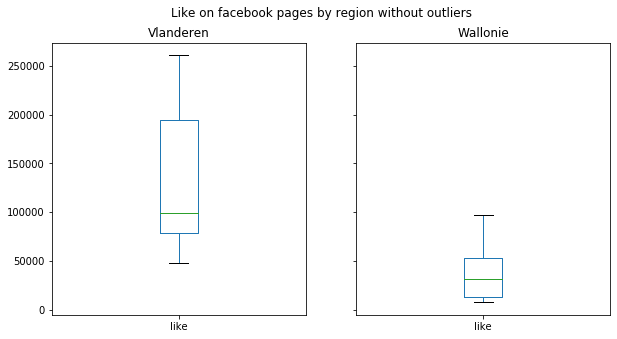

In [11]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
vlaams_stats.like.plot.box(ax=ax1, showfliers=False)
ax1.set_title("Vlanderen")
wallonie_stats.like.plot.box(ax=ax2)
ax2.set_title("Wallonie")
plt.suptitle("Like on facebook pages by region without outliers")
plt.show()

We can see that there is one big outlier the **Vlaams Belang**. With a budget of almost 800 000 € spent on ads on facebook and almost 500 000 likes on their facebook page.

If we do not consider this outlier we can see than in general the budget and the number of like are on average much higher in vlanderen. The disitribution is also wider than in Wallonie.

## Is the number of likes of budget allocated to ads related to the number of seats or delta ?

In [ ]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(17, 12))


stats_partis.plot.scatter('budget', 'delta', ax=ax1, c=stats_partis.color)
ax1.set_title("Budget vs Delta")

stats_partis.plot.scatter('budget', 'seat', ax=ax2, c=stats_partis.color)
ax2.set_title("Budget vs Seats")

stats_partis.plot.scatter('like', 'delta', ax=ax3, c=stats_partis.color)
ax3.set_title("Likes vs Delta")

stats_partis.plot.scatter('like', 'seat', ax=ax4, c=stats_partis.color)
ax4.set_title("Likes vs Seats")

plt.show()

There seems to be no correlation between the number of seats or the delta of seats and the budget allowed to the ads on facebook.

## What is the strategy of the different partis concerning ads on social media ?

To see the strategy of the different parties we will first look at the total budget by parti then we will look at the ratio of the budget over the total number of ads. We will also look at the correlation between the number of like and the budget spend on ads.

In [ ]:
stats_partis = stats_partis.sort_values(by='budget', ascending=False)
stats_partis = stats_partis.drop(['defi', 'spa'])
plt.figure()
stats_partis.plot.bar(y='budget', color=stats_partis.color)
plt.title("Budget of each parti dedidacted to ad")
plt.ylabel("Budget (€)")
plt.show()

TODO : Find the total budget of each parti during the campaign and plot the % of this budget used in facebook ads

In [ ]:
# count the number of ads
total_ads_parti = ads.groupby('parti').agg(count = ('status', 'count'))
total_ads_parti

In [ ]:
# Merge with the budget and like information
partis_count = pd.merge(stats_partis, total_ads_parti, left_index=True, right_index=True)
partis_count

In [ ]:
# sort values
partis_count = partis_count.sort_values(by='count', ascending=False)

plt.figure()
partis_count.plot.bar(y = 'count', color=partis_count.color)
plt.title("Number of ads published by parti")
plt.ylabel("Number of ads")
plt.show()

In [ ]:
# Compute the average budget per ad
partis_count['budget per ad'] = partis_count['budget']/partis_count['count']
# sort values
partis_count = partis_count.sort_values(by='budget per ad', ascending=False)


plt.figure()
partis_count.plot.bar(y = 'budget per ad', color=partis_count.color)
plt.show()

We can identify 2 different strategies :
* Published a lot of ads with smaller budget for each : used by `open vld`, `groen`, `cd&v`, `mr`
* Published smaller number of ads with a higher budget on each ad : `vlaams belang`, `nva`, `ptb/pvda`

### Correlation between budget and like

In [ ]:
plt.figure()
stats_partis.plot.scatter('budget', 'like', c=stats_partis.color)
plt.title("Budget vs Like")
plt.show()

In [ ]:
from scipy.stats import pearsonr
pearsonr(stats_partis.budget, stats_partis.like)[0]

We can assume that there is then a correlation. We cannot conclude about a causation.

If there is causation then we can encourage parti to spend more budget on social media because then they get more likes and can after that post messages on their page, these messages are free but can convince someone who was undecided and liked the parti's pages he saw an ad for.